### Team members

##### Chirag Bhuvaneshwara
* 2571703
* s8chbhuv@stud.uni-saarland.de

##### Priyasha Chatterjee 
* 2572739
* s8prchat@stud.uni-saarland.de

In [64]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import scipy.ndimage.filters as fi
import math

In [65]:
colaImage = Image.open("noisycoke.jpg")
colaImageMat = np.array(colaImage)
colaImageMat.shape

(640, 480)

# 1.1 Mirroring the image

In [66]:
def imgmirror(img, w):
    
    oldShape = img.shape
    newShape = (oldShape[0]+2*w, oldShape[1]+2*w)
    
    newImg = np.zeros(newShape)
    
    # Filling in the new image with only the entries from the old image
    for i in range(oldShape[0]):
        for j in range(oldShape[1]):
            newImg[i+w, j+w] += img[i,j]
    
    # Mirroring on the left, corners won't be reflected
    for i in range(w, newShape[0]-w):
        for j in range(w):
            newImg[i, w-j-1] += img[i-w, j]
    
    # Mirroring on the top, top left corner will be reflected
    for i in range(w):
        for j in range(newShape[1]):
            newImg[w-i-1,j] += newImg[i+w,j]
            
    # Mirroring on the right, top right corner will be reflected
    for i in range(newShape[0]):
        for j in range(newShape[1]-w, newShape[1]):
            newImg[i, j] += newImg[i, j-w]
    # Flipping horizontally        
    newImg[:newShape[0], newShape[1]-w:newShape[1]] = np.fliplr(newImg[:newShape[0], newShape[1]-w:newShape[1]] )

    
    # Mirroring on the bottom, bottom left and right corners will be reflected
    for i in range(newShape[0]-w, newShape[0]):
        for j in range(newShape[1]):
            newImg[i,j] += newImg[i-w, j]
    # Flipping Vertically
    newImg[newShape[0]-w:newShape[0], :newShape[1]] = np.flipud(newImg[newShape[0]-w:newShape[0], :newShape[1]])
    
    return newImg 

In [67]:
imgmirror(colaImageMat,2).shape

(644, 484)

In [68]:
r = np.arange(1,37).reshape(6,6)
r

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]])

In [69]:
imgmirror(r,2)

array([[ 8.,  7.,  7.,  8.,  9., 10., 11., 12., 12., 11.],
       [ 2.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  6.,  5.],
       [ 2.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  6.,  5.],
       [ 8.,  7.,  7.,  8.,  9., 10., 11., 12., 12., 11.],
       [14., 13., 13., 14., 15., 16., 17., 18., 18., 17.],
       [20., 19., 19., 20., 21., 22., 23., 24., 24., 23.],
       [26., 25., 25., 26., 27., 28., 29., 30., 30., 29.],
       [32., 31., 31., 32., 33., 34., 35., 36., 36., 35.],
       [32., 31., 31., 32., 33., 34., 35., 36., 36., 35.],
       [26., 25., 25., 26., 27., 28., 29., 30., 30., 29.]])

# 1.2 Gaussian Filtering

In [70]:
def gaussfilter(img, kernel, verbose = False):
    
    time1 = time.time()
    w = kernel.shape[0]
    imgMirror = imgmirror(img, w)
    
    a = int(w/2)
    
    newImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(w):
                for l in range(w):
                    newImg[i,j] += imgMirror[i+k-a, j+l-a] * kernel[k,l]
    
    time2 = time.time()
        
    if verbose == True:
        print('"gaussfilter" Function took {:.3f} ms'.format((time2-time1)*1000.0))
    
    return newImg
    

# 1.3 Denoising Coke

In [71]:
def gkern2(kernlen=5, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    # create nxn zeros
    inp = np.zeros((kernlen, kernlen))
    # set element at the middle to one, a dirac delta
    inp[kernlen//2, kernlen//2] = 1
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return fi.gaussian_filter(inp, nsig)

In [72]:
gkern2( nsig=5)

array([[0.04000038, 0.03999926, 0.04000168, 0.03999926, 0.04000038],
       [0.03999926, 0.03999813, 0.04000055, 0.03999813, 0.03999926],
       [0.04000168, 0.04000055, 0.04000297, 0.04000055, 0.04000168],
       [0.03999926, 0.03999813, 0.04000055, 0.03999813, 0.03999926],
       [0.04000038, 0.03999926, 0.04000168, 0.03999926, 0.04000038]])

In [73]:
smoothedImage1 = gaussfilter(colaImageMat, gkern2(kernlen=5, nsig=1), True)

"gaussfilter" Function took 10570.310 ms


In [74]:
smoothedImage3 = gaussfilter(colaImageMat, gkern2(kernlen=5, nsig=3), True)

"gaussfilter" Function took 10181.345 ms


In [75]:
smoothedImage5 = gaussfilter(colaImageMat, gkern2(kernlen=7, nsig=5), True)

"gaussfilter" Function took 19378.347 ms


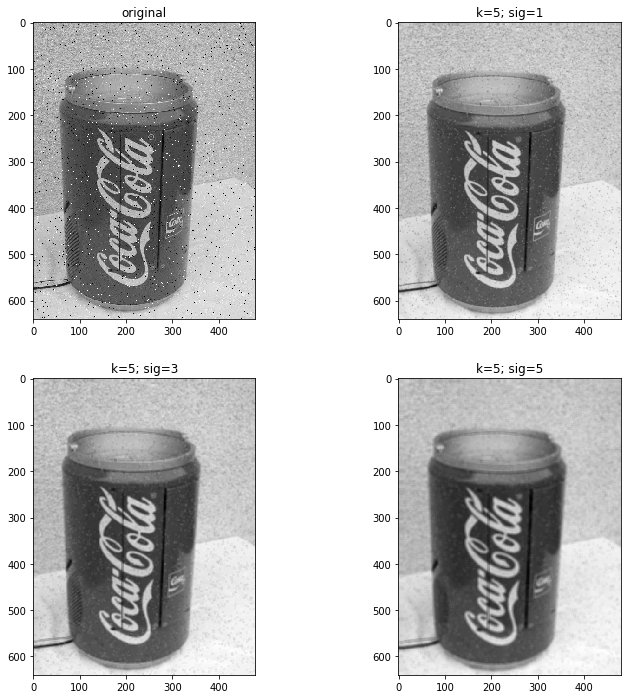

In [76]:
images= [colaImageMat, smoothedImage1, smoothedImage3, smoothedImage5]
titles = ["original", "k=5; sig=1", "k=5; sig=3", "k=5; sig=5"]
fig=plt.figure(figsize=(12, 12))

columns = 2
rows = 2

for i in range(1, 5):

    ax = plt.subplot(rows, columns, i)
    ax.set_title(titles[i-1])
    ax.imshow(images[i-1].astype(np.uint8), cmap = "gray")
# plt.imsave(str(i)+".png", images[i-1].astype(np.uint8))
plt.show()

We can see that increasing the sigma results in increasingly blurred edges and the blurriness increases significantly provided that the kernel size is also increased proportionally. The overall result is a smooth image with blurred edges.

Additionally, the running time of the code increases significantly with increase in sigma and kernel length. 

# 1.4 Using Separability property

In [44]:
def gaussfilter(img, kernel, verbose = True):
    
    time1 = time.time()
    w = kernel.shape[0]
    imgMirror = imgmirror(img, w)
    
    a = int(w/2)
    
    newImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(w):
                newImg[i,j] += imgMirror[i, j+k-a]  * kernel[k]

    newImgMirror = imgmirror(newImg, w)   
    newImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for l in range(w):
                newImg[i,j] += newImgMirror[i+l-a, j] * kernel[l]
    
    time2 = time.time()
        
    if verbose == True:
        print('"gaussfilter" Function took {:.3f} ms'.format((time2-time1)*1000.0))
    
    return newImg

In [45]:
def gkern1(kernlen=5, nsig=1):
    """Returns a 2D Gaussian kernel array."""

    # create n zeros
    inp = np.zeros((kernlen))
    # set element at the middle to one, a dirac delta
    inp[kernlen//2] = 1
    # gaussian-smooth the dirac, resulting in a gaussian filter mask
    return fi.gaussian_filter1d(inp, nsig)

In [48]:
smoothedImageSep3 = gaussfilter(colaImageMat, gkern1(kernlen= 7, nsig =5))

"gaussfilter" Function took 5345.102 ms


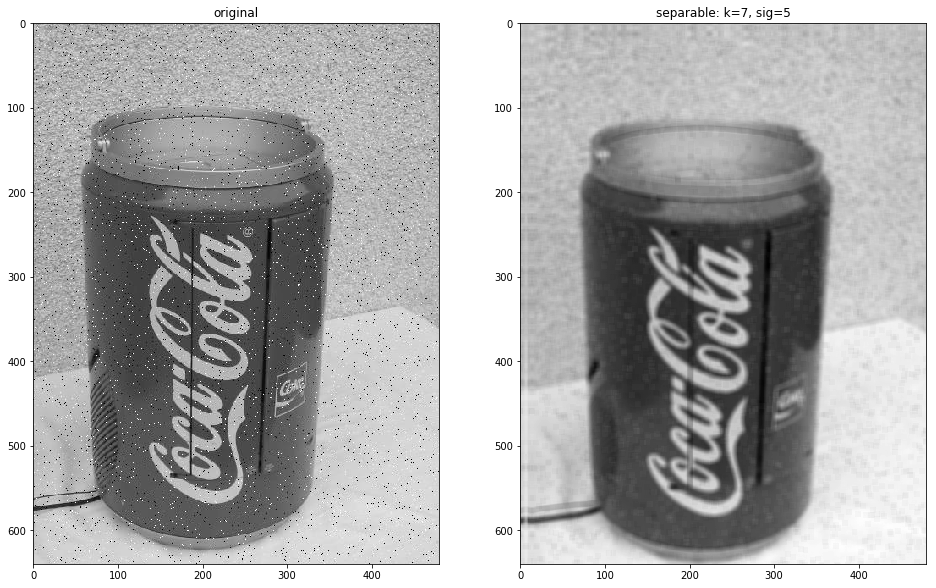

In [49]:
images= [colaImageMat, smoothedImageSep3]
titles = ["original", "separable: k=7, sig=5"]
fig=plt.figure(figsize=(16, 16))

columns = 2
rows = 1

for i in range(1, 3):

    ax = plt.subplot(rows, columns, i)
    ax.set_title(titles[i-1])
    ax.imshow(images[i-1].astype(np.uint8), cmap = "gray")
plt.show()

The separable version is faster because its algorithmic complexity is lesser.

The 2D version has an algorithmic complexity of $ O(n^2 + k^2) $ where as the separable version has an algorithmic complexity of $ O(n^2 + k) + O(n^2 + k) $ which is equal to $ O(n^2 + k) $ where $ n $ is the dimension of a square image in the X and Y directions and $ k $ is the length of the square kernel in X and Y directions.

# 2. Fourier Transform properties

In [57]:
from IPython.display import display, Image

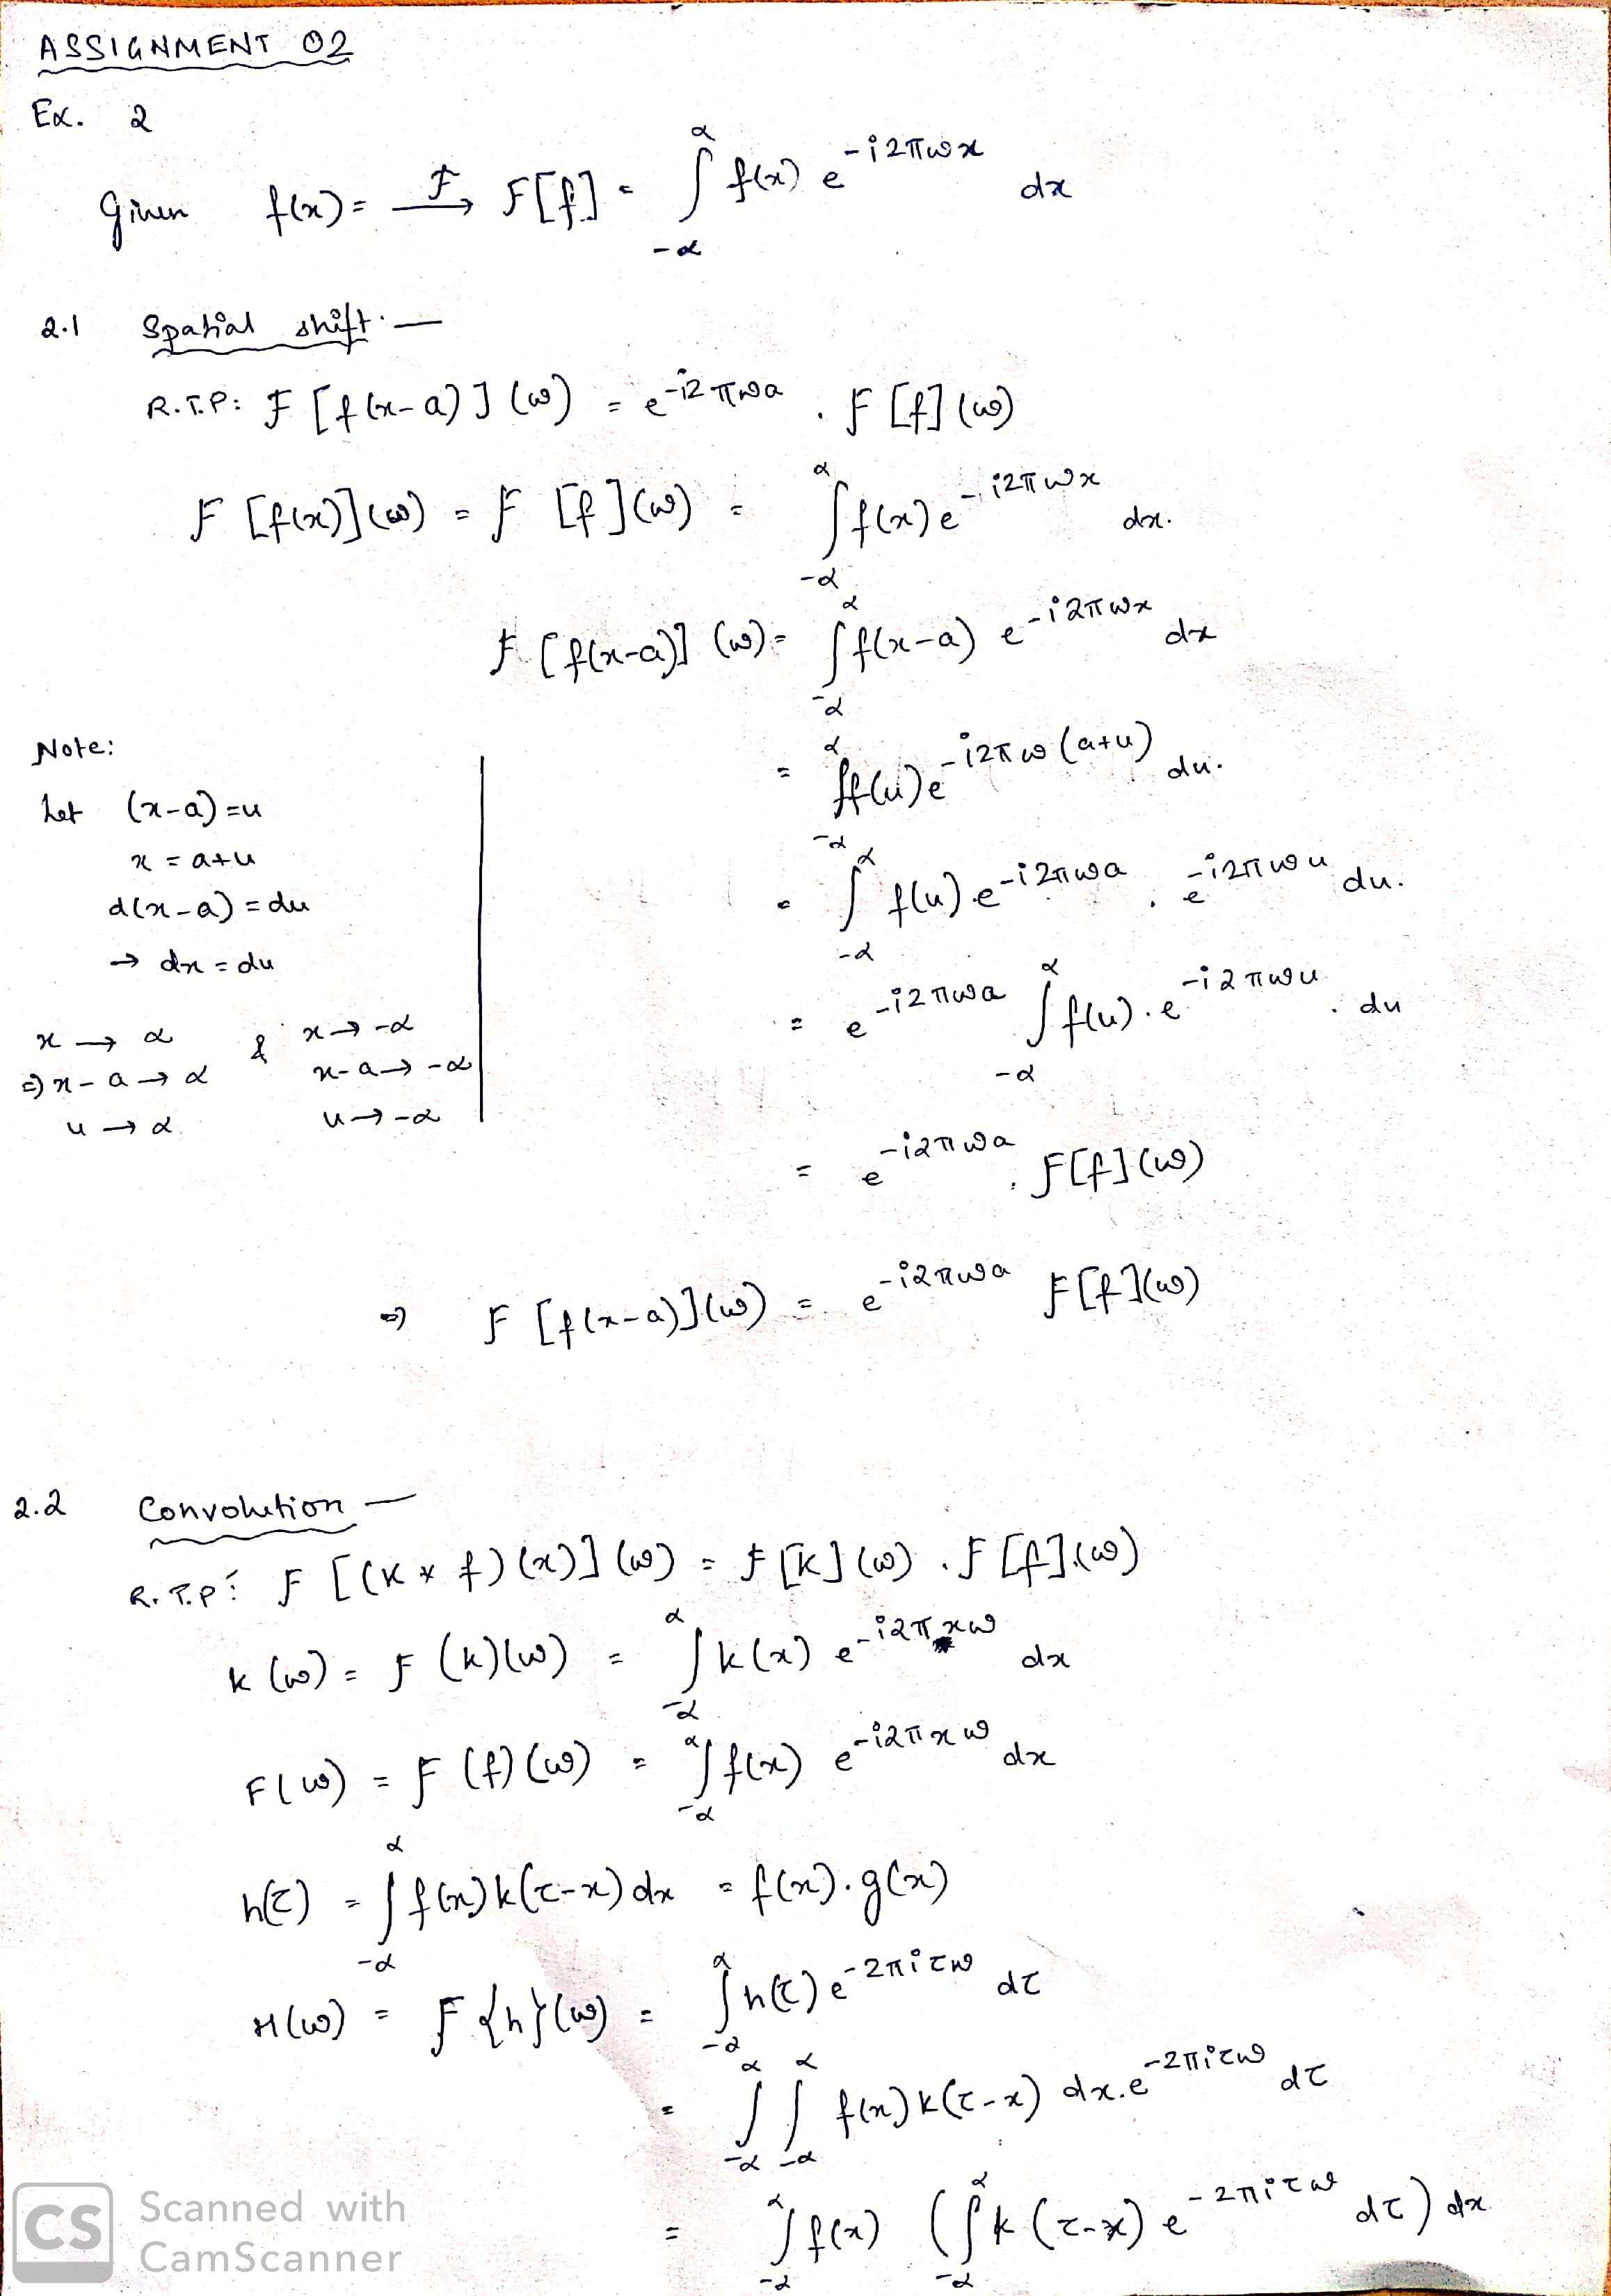

In [61]:
display(Image(filename='HandwrittenSolutions/DSP Assignment 2_1.jpg'))

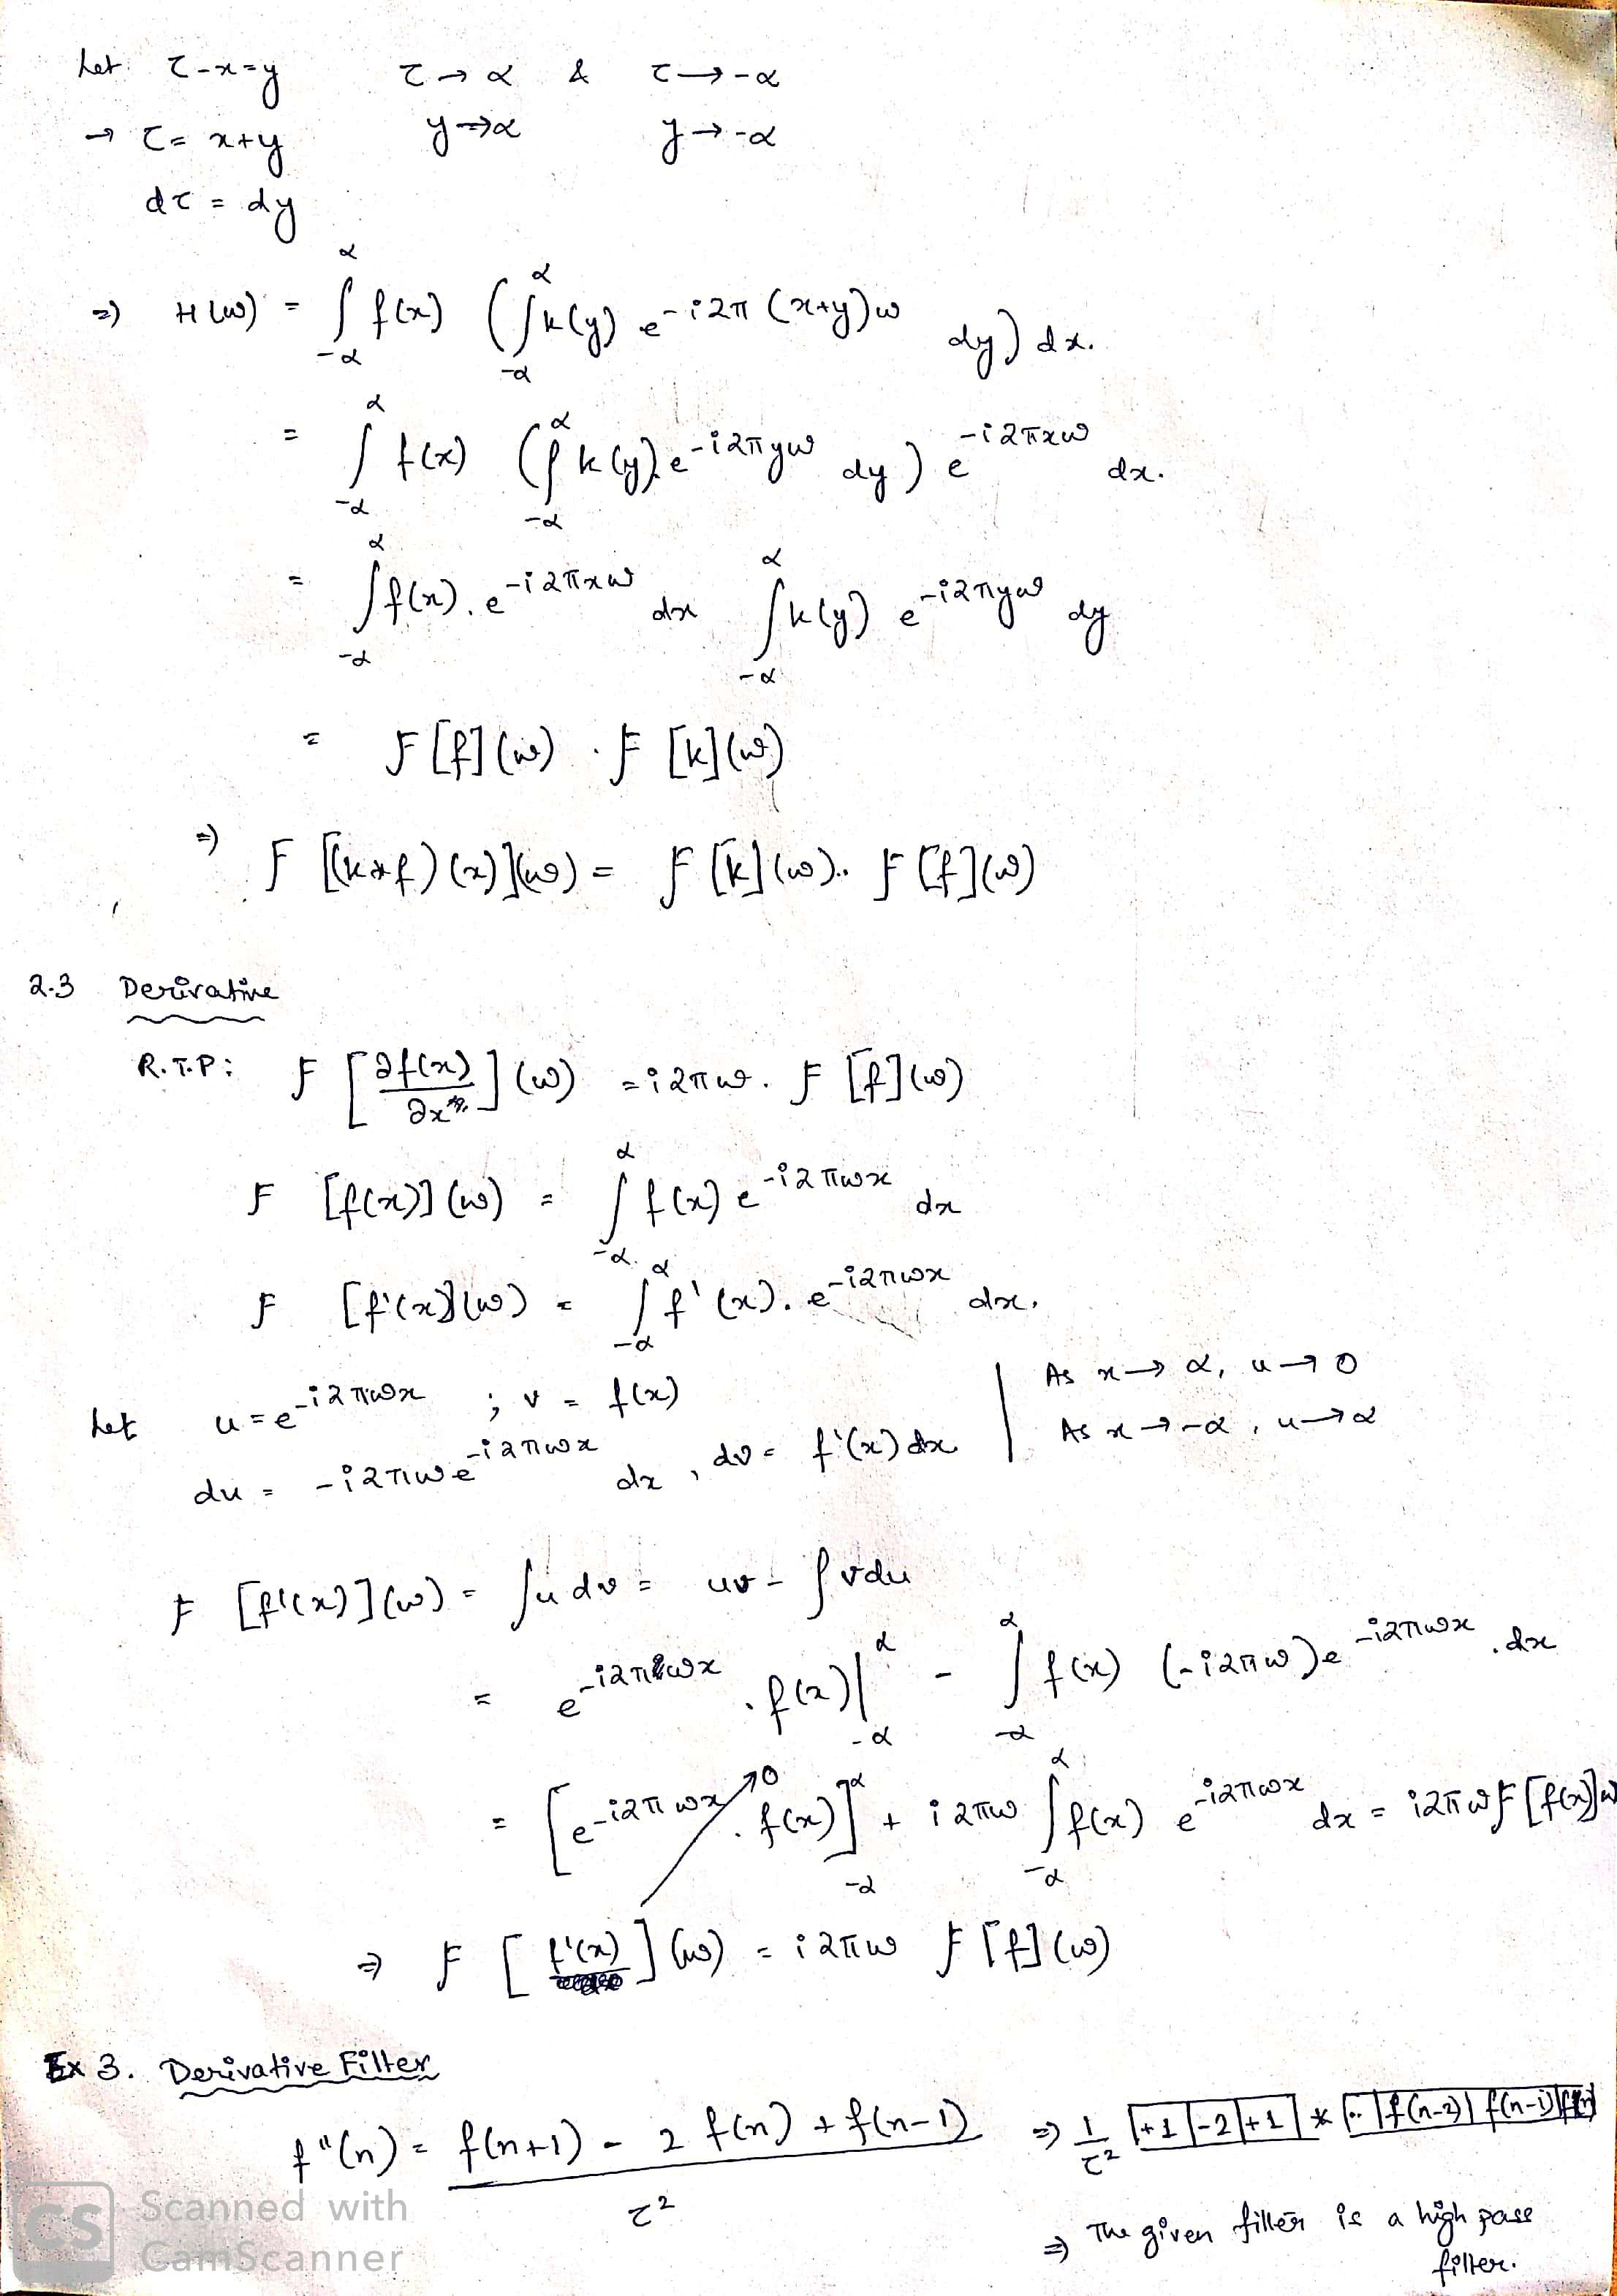

In [62]:
display(Image(filename='HandwrittenSolutions/DSP Assignment 2_2.jpg'))

# 3. Derivative Filter (Contd.)

The filter given here is a highpass filter as can be seen from the second order derivative of it. 
High pass filters are used for feature extraction purposes as they can be used to identify edges in images. 